##별 데이터 를 분석하여 이진 분류 하는 알고리즘 

In [1]:
#drivemount
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#import 
import pandas as pd 
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt 
import seaborn as sns
import csv 

In [3]:
stars_df = pd.read_csv('/content/drive/MyDrive/인공지능사관학교/딥러닝/data/pulsar_stars.csv')

In [4]:
stars_df.info()
'''
target_class = 종속변수
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                17898 non-null  float64
 1    Standard deviation of the integrated profile  17898 non-null  float64
 2    Excess kurtosis of the integrated profile     17898 non-null  float64
 3    Skewness of the integrated profile            17898 non-null  float64
 4    Mean of the DM-SNR curve                      17898 non-null  float64
 5    Standard deviation of the DM-SNR curve        17898 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7    Skewness of the DM-SNR curve                  17898 non-null  float64
 8   target_class                                   17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


'\ntarget_class = 종속변수\n'

In [5]:
stars_df.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


In [6]:
stars_df['target_class'].value_counts()
'''
0의 개수가 많아서 데이터 편향으로 인한 정확도 손실이 발생할수 있다
'''

'\n0의 개수가 많아서 데이터 편향으로 인한 정확도 손실이 발생할수 있다\n'

In [7]:
with open('/content/drive/MyDrive/인공지능사관학교/딥러닝/data/pulsar_stars.csv') as csvfile:
  csvreader = csv.reader(csvfile)
  next(csvreader)

  rows = []
  for row in csvreader:
    rows.append(row)
  

data = np.asarray(rows,dtype = 'float32')

input_cnt ,output_cnt = 8,1

data[:][0]

array([140.5625    ,  55.68378   ,  -0.23457141,  -0.6996484 ,
         3.1998327 ,  19.110426  ,   7.9755316 ,  74.242226  ,
         0.        ], dtype=float32)

In [8]:
#정규화 안할거임 

In [9]:
#train_test_index 

train_ratio = 0.8
mb_size = 32

train_test_index = int(train_ratio * data.shape[0])
train_test_index

14318

In [10]:
#shuffle map 
shuffle_map = np.arange(data.shape[0])
np.random.seed(1234)
np.random.shuffle(shuffle_map)
print(shuffle_map[:5])

[ 9375  1570 15443 14077  6079]


In [11]:
#train_test_split
train_data = data[shuffle_map[:train_test_index]]
test_data = data[shuffle_map[train_test_index:]]

In [12]:
train_x,train_y = train_data[:,:-output_cnt],train_data[:,-output_cnt:] 
test_x,test_y = test_data[:,:-output_cnt] , test_data[: , -output_cnt:]

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(14318, 8)
(14318, 1)
(3580, 8)
(3580, 1)


##drop out 
신경망의 과적합 을 방지 하기 위한 dropout 기법 
학습에서만 잘되는 것을 방지 하기 위해 
학습 할때만 무작위로 떨어 트려 비 활성화 

64개의 데이터를 학습 하면 
0.5 라면 32 개의 데이터는 비활성화 시킨다. 


In [13]:
#model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units = 128,activation=  'relu',input_shape = (8,)),
                             tf.keras.layers.Dense(units = 64,activation='relu'),
                             tf.keras.layers.Dropout(rate = 0.5),
                            tf.keras.layers.Dense(units = 32 , activation = 'relu'),
                             tf.keras.layers.Dense(units = 1 , activation = 'sigmoid'),
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1152      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 11,521
Trainable params: 11,521
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [16]:
history = model.fit(train_x,train_y,epochs = 15 , batch_size= 32,validation_split=0.2 , callbacks= tf.keras.callbacks.EarlyStopping(monitor= 'val_loss',patience= 3 ))
'''

'''

Epoch 1/15
358/358 [==============================] - 2s 3ms/step - loss: 0.5885 - accuracy: 0.9313 - val_loss: 0.0898 - val_accuracy: 0.9791
Epoch 2/15
358/358 [==============================] - 1s 2ms/step - loss: 0.1275 - accuracy: 0.9638 - val_loss: 0.0819 - val_accuracy: 0.9763
Epoch 3/15
358/358 [==============================] - 1s 2ms/step - loss: 0.1165 - accuracy: 0.9673 - val_loss: 0.1084 - val_accuracy: 0.9770
Epoch 4/15
358/358 [==============================] - 1s 2ms/step - loss: 0.1123 - accuracy: 0.9678 - val_loss: 0.0773 - val_accuracy: 0.9791
Epoch 5/15
358/358 [==============================] - 1s 2ms/step - loss: 0.1075 - accuracy: 0.9704 - val_loss: 0.0915 - val_accuracy: 0.9766
Epoch 6/15
358/358 [==============================] - 1s 2ms/step - loss: 0.1034 - accuracy: 0.9710 - val_loss: 0.0889 - val_accuracy: 0.9784
Epoch 7/15
358/358 [==============================] - 1s 2ms/step - loss: 0.1008 - accuracy: 0.9715 - val_loss: 0.0876 - val_accuracy: 0.9791


'\n\n'

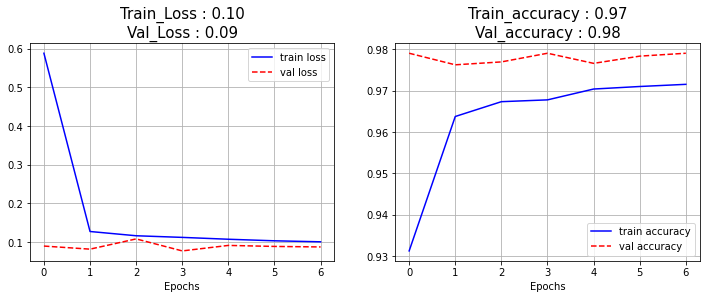

In [17]:
val_accuracy = history.history['val_accuracy']
accuracy = history.history['accuracy']

val_loss = history.history['val_loss']
loss = history.history['loss']

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)

plt.plot(history.history['loss'], 'b-', label = 'train loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val loss')
plt.xlabel('Epochs')

plt.title("Train_Loss : {:.2f}\nVal_Loss : {:.2f}".\
          format(loss[-1], val_loss[-1]), fontsize = 15)

plt.legend()
plt.grid()

plt.subplot(1, 2, 2)

plt.plot(history.history['accuracy'], 'b-', label = 'train accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label = 'val accuracy')
plt.xlabel('Epochs')

plt.title("Train_accuracy : {:.2f}\nVal_accuracy : {:.2f}".\
          format(accuracy[-1], val_accuracy[-1]), fontsize = 15)

plt.legend()
plt.grid()

plt.show()

In [18]:
pred_y = model.predict(test_x)
pred_y_3 = np.round(pred_y, 3)
print(pred_y_3[:10])

pred_y = np.round(pred_y_3)
print(pred_y[:10])

[[0.01 ]
 [0.008]
 [0.018]
 [0.006]
 [0.052]
 [0.033]
 [0.022]
 [0.026]
 [0.072]
 [0.043]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [19]:
pd.DataFrame(pred_y).value_counts()
'''
0으로만 예측 
'''

'\n0으로만 예측 \n'

In [20]:
print(pd.DataFrame(test_y).value_counts())
'''
1도 322 개있기 떄문에 정확도 예측이 안나온다
'''

0.0    3258
1.0     322
dtype: int64


'\n1도 322 개있기 떄문에 정확도 예측이 안나온다\n'

##혼동행렬
###confusion matrix

이진 분류 를 풀때는 평가를 참과 거짓 0/1 
예측 값이 참이다 /예측이 거짓일때 
결과 값이 참이다 / 결과 값이 거짓일때 

2*2 = 4 가지 케이스를 가질수 있다.

참참 = True Positive  - 신경망이 참으로 예측 해서 맞춘 케이스 

거짓 거짓 = True Negative - 신경망이 거짓으로 예측 해서 맞춘 케이스 

거짓 참 = False Negative - 신경망이 거짓으로 예측 했는데 실제 값이 참인 경우

참 거짓 = False Positive - 신경망이 참으로 예측 했는데 실제 값이 거짓인 경우 


In [21]:
#np.greate(x1,x2) 첫번째 매개변수 가 두번째 매개변수 보다 크면 참 반환

In [22]:
result = np.greater(pred_y,0.5)
print(pred_y)
print(result)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


In [23]:
#예측 값이 참이냐 
est_yes = np.greater(pred_y,0.5)
print(est_yes)
print('-------------------------------------------------')
#실제값이 참이냐 
ans_yes = np.greater(test_y,0.5)
print(ans_yes)
print('-------------------------------------------------')
#예측 값이 거짓이냐 
est_no = np.logical_not(est_yes)
print(est_no)
print('-------------------------------------------------')
#실제 값이 거짓이냐 
ans_no  = np.logical_not(ans_yes)
print(ans_no)
print('-------------------------------------------------')

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]
-------------------------------------------------
[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]
-------------------------------------------------
[[ True]
 [ True]
 [ True]
 ...
 [ True]
 [ True]
 [ True]]
-------------------------------------------------
[[ True]
 [ True]
 [ True]
 ...
 [ True]
 [ True]
 [ True]]
-------------------------------------------------


In [24]:
#TP 
tp = np.sum(np.logical_and(est_yes , ans_yes))
print(tp) #예측값이 전부 False = 0 이기 때문에 다 더해도 0 이 나온다 

266


In [25]:
#TN 
tn = np.sum(np.logical_and(est_no,ans_no))
print(tn) #예측 값 예측값이 랑 실제값이 0으로 맞는 케이스가 3258 개가 있다

3233


In [26]:
#FP
fp = np.sum(np.logical_and(est_yes,ans_no))
print(fp) #예측 케이스 1 이 조건이 없다 

25


In [27]:
#FN
fn  = np.sum(np.logical_and(est_no,ans_yes))
print(fp)

25


In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [29]:
print(confusion_matrix(test_y[:,0],pred_y[:,0]))

[[3233   25]
 [  56  266]]


In [30]:
precision = tp/(tp+fp)
print(precision)
recall = tp / (tp+fn)
print(recall)

0.9140893470790378
0.8260869565217391


In [31]:
print(precision_score(test_y[:,0],pred_y[:,0]))
print(recall_score(test_y[:,0],pred_y[:,0]))

0.9140893470790378
0.8260869565217391


In [32]:
def safe_div(p,q):
  p,q = float(p),float(q)

  if np.abs(q) < 1.0e-20:
    return np.sign(p) #분자의 부호에 맞춰서 출력 양수면 1 음수면 -1 0이면 0
  return p/q

In [33]:
#정확도 
accuracy = safe_div((tp+tn) , (tp+tn+fp+fn))
print(accuracy)

0.9773743016759776


In [34]:
#F1 score 
F1 = 2*safe_div((precision * recall),(precision + recall))
print(F1)

0.867862969004894


In [35]:
#sklearn 
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

print(accuracy_score(test_y[:,0],pred_y[:,0]))
print(f1_score(test_y[:,0],pred_y[:,0]))

0.9773743016759776
0.867862969004894
